# Setup

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

For this clustering exercise, we will use the built-in dataset available in `sklearn`.

In [2]:
df = load_iris(return_X_y=False, as_frame=True)

In [3]:
df

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

`df` dataframe is a dictionary (key-value pairs). We need to access the dataset with the `data` key. The dictionary also does contains information about the dataset (`DESCR` key).

# Load the data

In [4]:
df_iris = df.data
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Exploratory data analysis
 
For this example, we will only compute the statistical measures, such as the metrics available in `describe()` and `corr()` methods. We will skip the data visualization. If you had forgotten the visualization tools, please go back to files: "visualization_final_ws.ipynb", "regression_1_ws.ipynb" and "classification_diabetes_ws.ipynb".

In [5]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


# Data preprocessing
Since the features of this dataset all have the same units (normally, you won't encounter this in real application), so data preprocessing is not required.

# Clustering

## K-means clustering
We know that the flowers consist of 3 species, we can simply set the *number of clusters*, k as 3.

In [7]:
# scaler = StandardScaler()
kmeans_clust = KMeans(n_clusters=3, random_state=42)

# pipe = Pipeline([('scale', scaler), ('kmeans', kmeans_clust)])
res = kmeans_clust.fit(df_iris.to_numpy())

### print out the predictions by k-means clustering

In [8]:
res.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### print out the cluster centroids

In [9]:
res.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# Prepare for the clustering evaluation

Grab the **ground truth label** from `df.target`.

In [10]:
true_labels = df.target
true_labels.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

### Concatenate the target with the `df`

In [11]:
# concatenate labels with real data
data_all = pd.concat([df_iris, pd.DataFrame(true_labels)], axis=1)
cate_dict = {0: "setosa", 1: "versicolor", 2: "virginica"}
data_all = data_all.replace({"target": cate_dict})
data_all.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Use `groupby()` API to compute the mean by target

In [12]:
mean_agg = data_all.groupby("target").mean()
mean_agg

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### Create a prediction label dictionary to map it to the ground truth
How? We will apply L2-norm distance measure.

In [13]:
# create a dictionary for the prediction label
from numpy import linalg as LA
import numpy as np
pred_code = {}

for i, center in enumerate(mean_agg.to_numpy()):
    dist = LA.norm(center - res.cluster_centers_, axis=1)
    min_ind = np.argmin(dist)
    pred_code[i] = mean_agg.index[min_ind]

In [14]:
pred_code

{0: 'versicolor', 1: 'setosa', 2: 'virginica'}

### Concatenate the k-means label on the `data_all` DataFrame

In [15]:
# concatenate again
data_all = pd.concat([data_all, pd.DataFrame(res.labels_, columns=["k-means labels"])], axis=1)
data_all.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,k-means labels
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [16]:
data_all = data_all.replace({"k-means labels": pred_code})
data_all.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,k-means labels
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


___

# Hands-on practice
1. The model evaluation is not complete. Evaluate the clustering results in terms of accuracy and adjusted rand index.

2. Try to perform the task on this [Kaggle webpage](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data). Below are the snapshot:
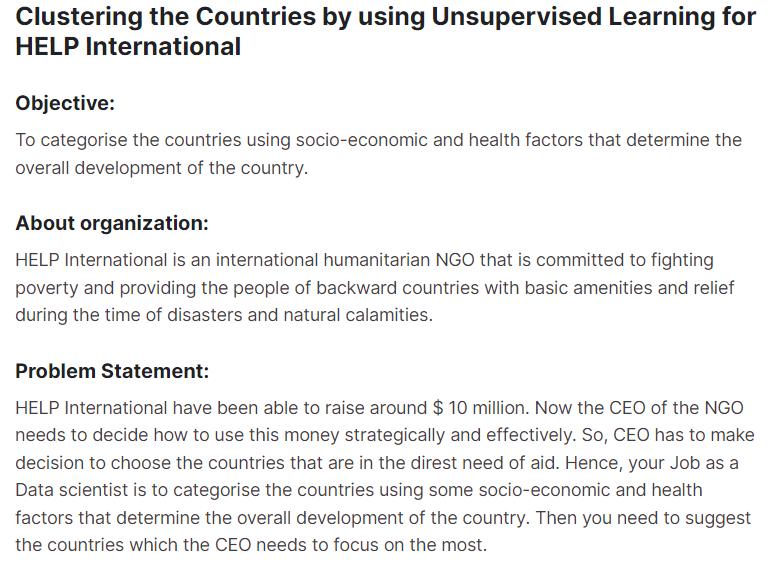